In [39]:
import os
# use CPU
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""
# use GPU 0,1
os.environ["CUDA_VISIBLE_DEVICES"]="3"

In [40]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import resource
import numpy as np
from skimage import img_as_bool, io, color

#soft, hard = resource.getrlimit(resource.RLIMIT_NOFILE)
#resource.setrlimit(resource.RLIMIT_NOFILE, (hard, hard))

thickTrainDir = "data/train/thick/"
thinTrainDir = "data/train/thin/"
thickValDir = "data/validation/thick/"
thinValDir = "data/validation/thin/"

X_train = []
y_train = []
X_val = []
y_val = []

#thickImgs = os.listdir(thickTrainDir)
#for thickImg in thickImgs:
#    imgPath = thickTrainDir + thickImg
#    if not os.path.isdir(imgPath) :
#        x = load_img(imgPath)
#        x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
#        x_train.append(x)

#x_train = np.array(x_train)

# se leen todas la imagenes de un directorio, se convierten en matriz y se guardan en imglist
# el tipo de imagen se guarda en labels
def appendImgs(imglist, labels, directory):
    imgs = os.listdir(directory)
    for img in imgs:
        imgPath = directory + img
        if not os.path.isdir(imgPath) :
            x = load_img(imgPath)
            x = img_as_bool(color.rgb2gray(io.imread(imgPath)))
            imglist.append(x)
            if 'thick' in imgPath:
                labels.append(1)
            elif 'thin' in imgPath:
                labels.append(0)

appendImgs(X_train, y_train, thickTrainDir)
appendImgs(X_train, y_train, thinTrainDir)

appendImgs(X_val, y_val, thickValDir)
appendImgs(X_val, y_val, thinValDir)

X_train = np.array(X_train).astype(int)
y_train = np.array(y_train)

X_val = np.array(X_val).astype(int)
y_val = np.array(y_val)

#X_train.shape

print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)

print('X_val.shape = ', X_val.shape)
print('y_val.shape = ', y_val.shape)

#print(X_train)
#train_thick =   

# create generator
#datagen = ImageDataGenerator()

/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


X_train.shape =  (2000, 256, 256)
y_train.shape =  (2000,)
X_val.shape =  (400, 256, 256)
y_val.shape =  (400,)


[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


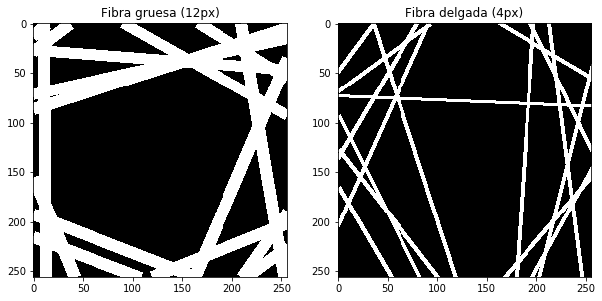

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import random

random_image_thick = random.randint(0, X_train.shape[0]/2-1)
random_image_thin = random.randint(X_train.shape[0]/2,X_train.shape[0])

#plt.imshow(X_train[random_image_thick],cmap='gray')
#plt.show()
#plt.imshow(X_train[random_image_thin],cmap='gray')


fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].imshow(X_train[random_image_thick],cmap='gray')
axs[0].set_title("Fibra gruesa (12px)")
axs[1].imshow(X_train[random_image_thin],cmap='gray')
axs[1].set_title("Fibra delgada (4px)")

#print(X_train[random_image_thick])


In [46]:
import sys

np.set_printoptions(threshold=sys.maxsize)

#X_train[random_image_thick]

In [25]:
#train_it = datagen.flow_from_directory('data/train/', class_mode='binary')
#val_it = datagen.flow_from_directory('data/validation/', class_mode='binary')

#train_it

#import matplotlib.pyplot as plt

#plt.imshow(train_it[0], cmap='gray', vmin=0, vmax=255)
#plt.show()


#batchX, batchy = train_it.next()
#print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))

In [77]:
#import keras
from tensorflow import keras
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D, BatchNormalization
import tensorflow as tf

print('version de tensorflow')
print(tf.__version__)

tf.keras.backend.clear_session()

#config = tf.compat.v1.ConfigProto()
#config.gpu_options.allow_growth = True
#session = tf.compat.v1.Session(config=config)

NUM_CLASSES = 2
#NUM_FILTERS = 128
NUM_FILTERS = 32

#bs = 32
#epochs = 10
#lr = 0.001

#model = Sequential()
#model.add(Flatten(input_shape=X_train[0].shape))
#model.add(Dense(128, activation='relu'))
#model.add(Dense(2, activation='softmax'))
#model.compile(optimizer=SGD(lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()

REGU_L2 = 0.001

X_train = X_train.reshape(X_train.shape[0], 256, 256, 1)
X_val = X_val.reshape(X_val.shape[0], 256, 256, 1)


input_shape = (256, 256, 1)

#print('X_train.shape:', X_train.shape)

model = Sequential()
model.add(Conv2D(NUM_FILTERS, kernel_size=(5,5), activation='relu', use_bias=False, kernel_regularizer=keras.regularizers.l2(l=REGU_L2), input_shape=input_shape))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(AveragePooling2D(pool_size=(4, 4)))

model.add(Conv2D(64, (5, 5), activation='relu',use_bias=False,kernel_regularizer=keras.regularizers.l2(l=REGU_L2)))
model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(AveragePooling2D(pool_size=(4, 4)))

model.add(Conv2D(128, (5, 5), activation='relu',use_bias=False,kernel_regularizer=keras.regularizers.l2(l=REGU_L2)))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(4, 4)))

model.add(Dropout(0.25))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(l=REGU_L2)))

#model.add(Dense(64, activation=tf.nn.relu))
#model.add(Dense(32, activation=tf.nn.relu))

model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES,activation='softmax',kernel_regularizer=keras.regularizers.l2(l=REGU_L2)))

optimizer = keras.optimizers.Adam(lr=0.001)
#optimizer = keras.optimizers.SGD(lr=0.001,momentum=0.9)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.summary()


##model building
#model = Sequential()
#convolutional layer with rectified linear unit activation
#model.add(Conv2D(32, kernel_size=(3, 3),
                 #activation='relu',
                 #input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
#model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
#model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
#model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
#model.add(Flatten())
#fully connected to get all relevant data
#model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
#model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
#model.add(Dense(num_category, activation='softmax'))

version de tensorflow
2.0.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 252, 252, 32)      800       
_________________________________________________________________
batch_normalization_1 (Batch (None, 252, 252, 32)      128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        51200     
_________________________________________________________________
batch_normalization_2 (Batch (None, 59, 59, 64)        256       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)         

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#BATCH_SIZE = 128
#BATCH_SIZE = 8
BATCH_SIZE = 1

EPOCHS = 5
# log = model.fit(X_train, y_train, batch_size=bs, epochs=epochs, validation_data=[X_val, y_val])
#log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val))
#log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=1)

log = model.fit(x=X_train,y=y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_val, y_val), verbose=1)

'''
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'data/train',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'data/validation',
    target_size=(256, 256),
    batch_size=BATCH_SIZE,
    class_mode='binary')
    
log = model.fit_generator(
    train_generator,
    steps_per_epoch=2000,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=800)    

# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
	horizontal_flip=True, fill_mode="nearest")

# train the network
log = model.fit_generator(aug.flow(X_train, y_train, batch_size=BATCH_SIZE),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // BATCH_SIZE,
	epochs=EPOCHS)
'''

Train on 2000 samples, validate on 400 samples
Epoch 1/5
2000/2000 [==============================] - 19s 9ms/step - loss: 0.5337 - accuracy: 0.9095 - val_loss: 1.6832 - val_accuracy: 0.6175
Epoch 2/5
2000/2000 [==============================] - 18s 9ms/step - loss: 0.3635 - accuracy: 0.9740 - val_loss: 8.2768 - val_accuracy: 0.4250
Epoch 3/5
2000/2000 [==============================] - 18s 9ms/step - loss: 0.3724 - accuracy: 0.9555 - val_loss: 2.7993 - val_accuracy: 0.5550
Epoch 4/5
2000/2000 [==============================] - 17s 9ms/step - loss: 0.3341 - accuracy: 0.9805 - val_loss: 6.0759 - val_accuracy: 0.3575
Epoch 5/5
2000/2000 [==============================] - 17s 9ms/step - loss: 0.2383 - accuracy: 0.9865 - val_loss: 16.1652 - val_accuracy: 0.2925


'\ntrain_datagen = ImageDataGenerator(\n    rescale=1./255,\n    shear_range=0.2,\n    zoom_range=0.2,\n    horizontal_flip=True)\n\ntest_datagen = ImageDataGenerator(rescale=1./255)\n\ntrain_generator = train_datagen.flow_from_directory(\n    \'data/train\',\n    target_size=(256, 256),\n    batch_size=BATCH_SIZE,\n    class_mode=\'binary\')\n\nvalidation_generator = test_datagen.flow_from_directory(\n    \'data/validation\',\n    target_size=(256, 256),\n    batch_size=BATCH_SIZE,\n    class_mode=\'binary\')\n    \nlog = model.fit_generator(\n    train_generator,\n    steps_per_epoch=2000,\n    epochs=EPOCHS,\n    validation_data=validation_generator,\n    validation_steps=800)    \n\n# construct the training image generator for data augmentation\naug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,\n\twidth_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,\n\thorizontal_flip=True, fill_mode="nearest")\n\n# train the network\nlog = model.fit_generator(aug.flow(X_trai

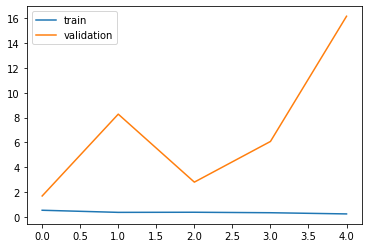

In [79]:
plt.plot(log.history['loss'], label='train')
plt.plot(log.history['val_loss'], label='validation')
#plt.plot(log.history['accuracy'], label='train')
#plt.plot(log.history['val_accuracy'], label='validation')
plt.legend()

In [80]:
score = model.evaluate(X_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 16.165169372558594
Test accuracy: 0.29249998927116394


In [14]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
img_width,img_height = 256,256
#img = load_img('data/validation/thick/0001.png',False,target_size=(img_width,img_height))

test_dir = "data/test/"

test_imgs = os.listdir(test_dir)
predicciones = []
imagenes = []
for img in test_imgs:
    imgPath = test_dir + img
    if not os.path.isdir(imgPath) :
        imgBool = img_as_bool(color.rgb2gray(io.imread(imgPath)))
        imagenes.append(imgBool)
        
        x = img_to_array(imgBool)
        x = np.expand_dims(x, axis=0)
        clases = model.predict_classes(x)
        clase = None
        if 1 in clases:
            clase = "Fibra gruesa"
        elif 0 in clases:
            clase = "Fibra delgada"
        predicciones.append(clase)
        print(img, " es ", clase)


#img = img_as_bool(color.rgb2gray(io.imread('data/test/0001.png')))
#x = img_to_array(img)
#x = np.expand_dims(x, axis=0)
#preds = model.predict_classes(x)
#prob = model.predict_proba(x)
#print(preds, prob)
#preds

/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/home/aalejo/anaconda3/envs/iaenv/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


0020.png  es  Fibra gruesa
0001.png  es  Fibra delgada
0014.png  es  Fibra gruesa
0011.png  es  Fibra gruesa
0002.png  es  Fibra delgada
0004.png  es  Fibra delgada
0009.png  es  Fibra gruesa
0015.png  es  Fibra gruesa
0017.png  es  Fibra gruesa
0006.png  es  Fibra delgada
0003.png  es  Fibra delgada
0013.png  es  Fibra gruesa
0007.png  es  Fibra gruesa
0008.png  es  Fibra gruesa
0012.png  es  Fibra gruesa
0019.png  es  Fibra gruesa
0005.png  es  Fibra delgada
0018.png  es  Fibra gruesa
0016.png  es  Fibra gruesa
0010.png  es  Fibra gruesa


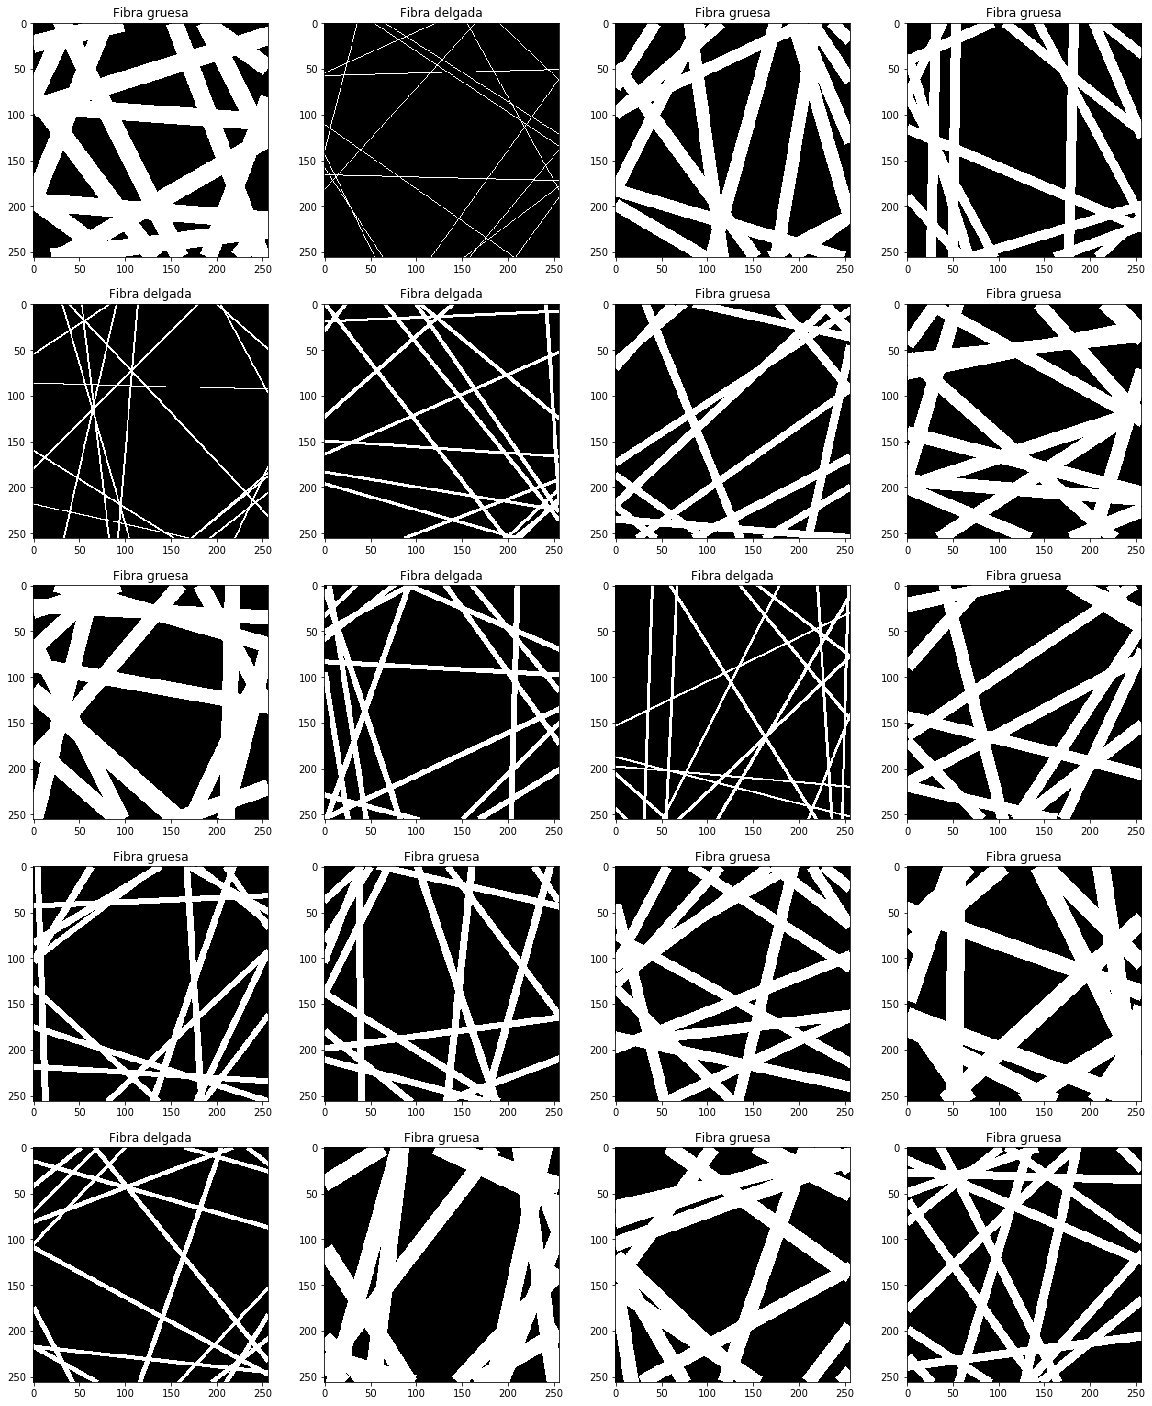

In [16]:
import math

#img = img_as_bool(color.rgb2gray(io.imread('data/test/0001.png')))
#x = img_to_array(img)
#x = np.array(img)
#plt.imshow(x)

filas = math.ceil(len(imagenes)/4)
fig, axs = plt.subplots(filas, 4, figsize=(20,25))

fila = 0
col = 0

for k, img in enumerate(imagenes):
    
    col = col % 4
    
    axs[fila, col].imshow(np.array(img),cmap='gray')
    axs[fila, col].set_title(predicciones[k])
    
    col+=1
    
    if col == 4:
        fila+=1
    

#axs[0].imshow(X_train[random_image_thick],cmap='gray')
#axs[0].set_title("Fibra gruesa (12px)")
#axs[1].imshow(X_train[random_image_thin],cmap='gray')
#axs[1].set_title("Fibra delgada (4px)")
